# IRIS EDA
Read the iris Dataset from seaborn and perform the data encoding and feature scaling  operations on it .

NOTE - Use MinMaxScaler and StandardScaler 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_table("iris.data")
df

,"5.1,3.5,1.4,0.2,Iris-setosa"
0,"4.9,3.0,1.4,0.2,Iris-setosa"
1,"4.7,3.2,1.3,0.2,Iris-setosa"
2,"4.6,3.1,1.5,0.2,Iris-setosa"
3,"5.0,3.6,1.4,0.2,Iris-setosa"
4,"5.4,3.9,1.7,0.4,Iris-setosa"
...,...
144,"6.7,3.0,5.2,2.3,Iris-virginica"
145,"6.3,2.5,5.0,1.9,Iris-virginica"
146,"6.5,3.0,5.2,2.0,Iris-virginica"
147,"6.2,3.4,5.4,2.3,Iris-virginica"


In [6]:
col=["sepal length in cm","sepal width in cm","petal length in cm","petal width in cm","class"]

In [12]:
df=pd.read_table("iris.data",sep=",",header=None,names=col)
df

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal length in cm  150 non-null    float64
 1   sepal width in cm   150 non-null    float64
 2   petal length in cm  150 non-null    float64
 3   petal width in cm   150 non-null    float64
 4   class               150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


There are 150 raws and 5 columns in the iris dataset.
<br>Only one column has categorical data and rest all columns are of the numeric type data with non-null values.


In [14]:
df.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Aggregation functions


In [27]:
#Calculate mean and median or others using multiple functions at once - 2 methods
df.groupby('class').agg(['mean', 'median'])
df.groupby('class').agg([np.mean, np.median])

sepal length in cm        sepal width in cm         \
                              mean median              mean median   
class                                                                
Iris-setosa                  5.006    5.0             3.418    3.4   
Iris-versicolor              5.936    5.9             2.770    2.8   
Iris-virginica               6.588    6.5             2.974    3.0   

                petal length in cm        petal width in cm         
                              mean median              mean median  
class                                                               
Iris-setosa                  1.464   1.50             0.244    0.2  
Iris-versicolor              4.260   4.35             1.326    1.3  
Iris-virginica               5.552   5.55             2.026    2.0

1. sepal length in cm and sepal width in cm columns are approximately normal distribution as the mean is equal to the median.
2. In petal length in cm (mean= 3.75 )< (median = 4.35) The mean is less than the median in negatively distributed data 
3. In petal width in cm (mean = 1.19) > (median = 1.30) The mean is greater than median in positively distributed data.


In [28]:
df.isnull().sum()

sepal length in cm    0
sepal width in cm     0
petal length in cm    0
petal width in cm     0
class                 0
dtype: int64

There are no missing values in the data.

In [29]:
df.shape

(150, 5)

In [30]:
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
df.tail()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## Distribution Plot

Text(0.5, 1.0, 'Distribution of sepal length in cm')

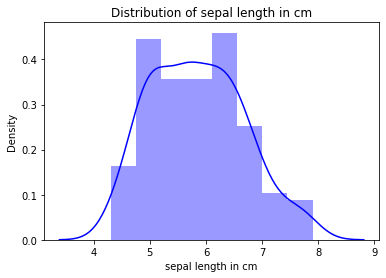

In [33]:
sns.distplot(a=df['sepal length in cm'], color='blue')
plt.title("Distribution of sepal length in cm")

Text(0.5, 1.0, 'Distribution of sepal length in cm')

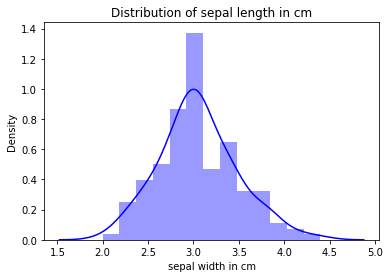

In [34]:
sns.distplot(a=df['sepal width in cm'], color='blue')
plt.title("Distribution of sepal width in cm")

Text(0.5, 1.0, 'Distribution of petal length in cm')

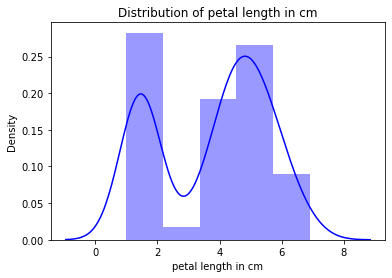

In [35]:
sns.distplot(a=df['petal length in cm'], color='blue')
plt.title("Distribution of petal length in cm")

Text(0.5, 1.0, 'Distribution of petal width in cm')

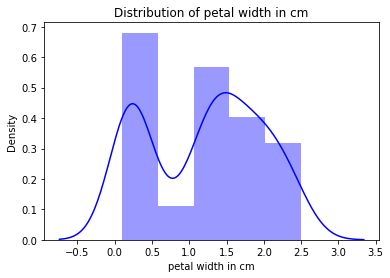

In [36]:
sns.distplot(a=df['petal width in cm'], color='blue')
plt.title("Distribution of petal width in cm")

## Count plot
displays the number of observations for a categorical variable using bars.

<AxesSubplot:xlabel='class', ylabel='count'>

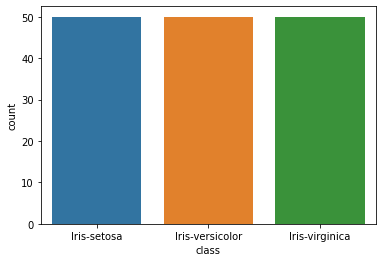

In [42]:
sns.countplot(x='class', data=df)

## Box Plot
shows the distribution of quantitative data across a categorical variable.

<AxesSubplot:xlabel='class', ylabel='petal width in cm'>

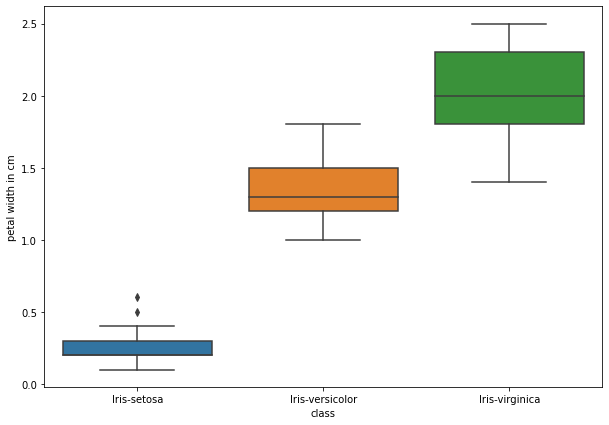

In [52]:
plt.figure(figsize=(10,7))
sns.boxplot(x='class',y='petal width in cm', data=df)

## Matrix plots
HeatMap - It provides the graph of the correlation matrix.

Cluster Map - It is a plot of matrix dataset as a hierarchically clustered heatmap

In [64]:
df.corr()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
sepal length in cm,1.000000,-0.109369,0.871754,0.817954
sepal width in cm,-0.109369,1.000000,-0.420516,-0.356544
petal length in cm,0.871754,-0.420516,1.000000,0.962757
petal width in cm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

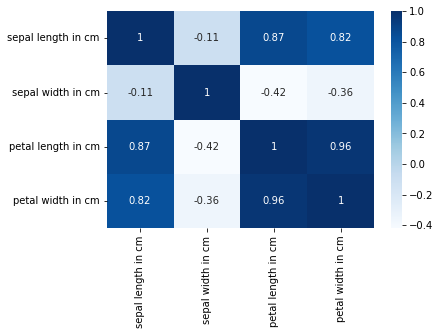

In [65]:
sns.heatmap(df.corr(),annot=True,cmap="Blues")

In [54]:
features=df.iloc[:,:-2]
target=df.iloc[:,-2]

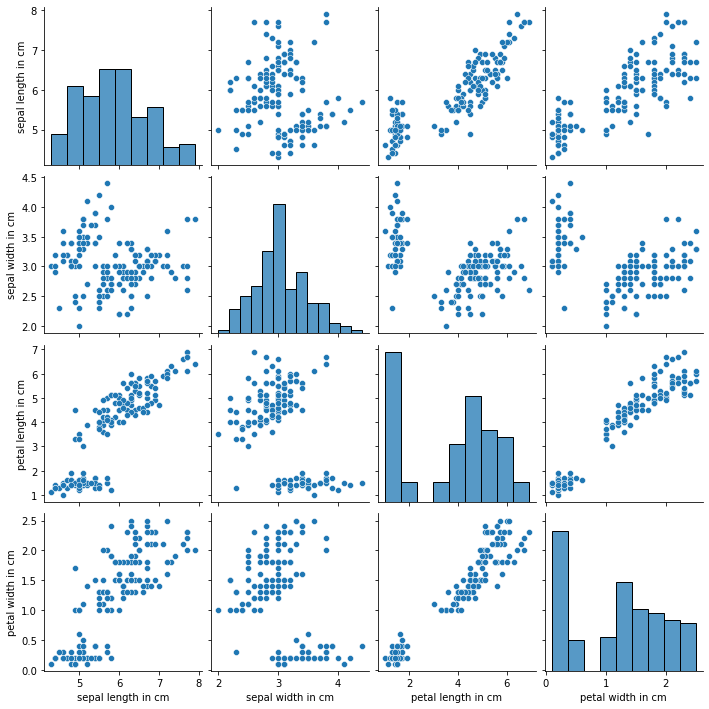

In [90]:
sns.pairplot(df)

* The above plot is the pair plot of all the probable combination of the features. The diagonal holds the histogram of each feature.
* Out of all, the relationship of petal length and petal width is most linear which means that they hold strong relationship.
* As the data points fall as uphill from left to right, they hold a positive relationship. In fact, most of them hold positive relationship.
* Petal length and sepal length is also one of the most linear plots with positive relationship.
* Roughly, there are no major outliers in the plot but may be there are some high-leverage points.
* In all the scatter plots, a segment of points is separated from majority of data points. To dig deeper, I will plot the pair plot with target variable "Species" as third variable.

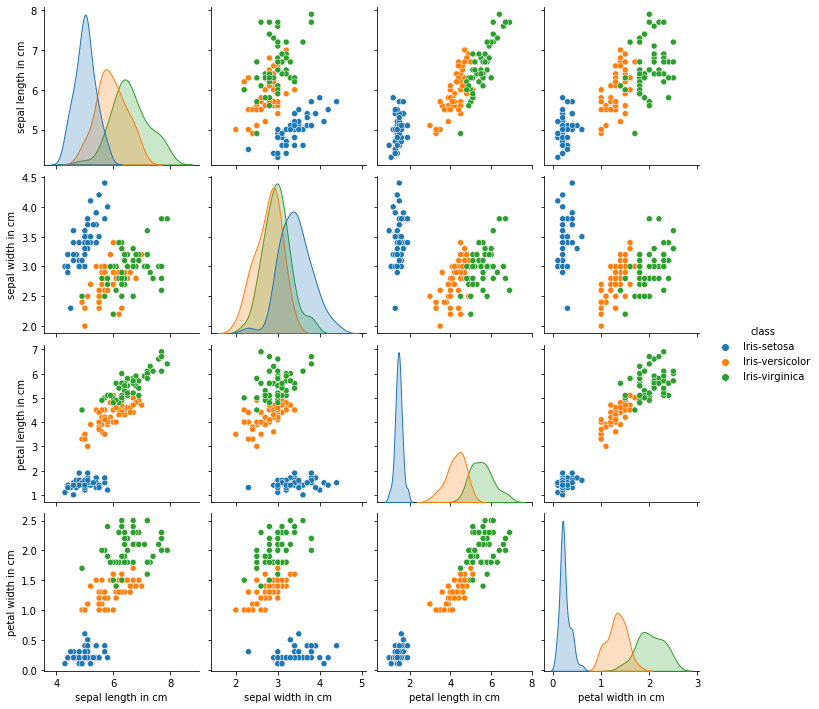

In [73]:
sns.pairplot(df, hue="class")

Pair plot represents the relationship between our target and the variables. We can see that the setosa sclass has a large difference in its characteristics when compared to the other sclass, it has smaller petal width and length while its sepal width is high and its sepal length is low. Similar kind of conclusions can be drawn for the other sclass like the Versicolor sclass usually have average dimensions whether it is sepal or pedal. While virginica has high pedal width and length while it has small sepal width but large sepal length.

## Histograms

(array([50.,  0., 11., 43., 35., 11.]),
 array([1.        , 1.98333333, 2.96666667, 3.95      , 4.93333333,
        5.91666667, 6.9       ]),
 <BarContainer object of 6 artists>)

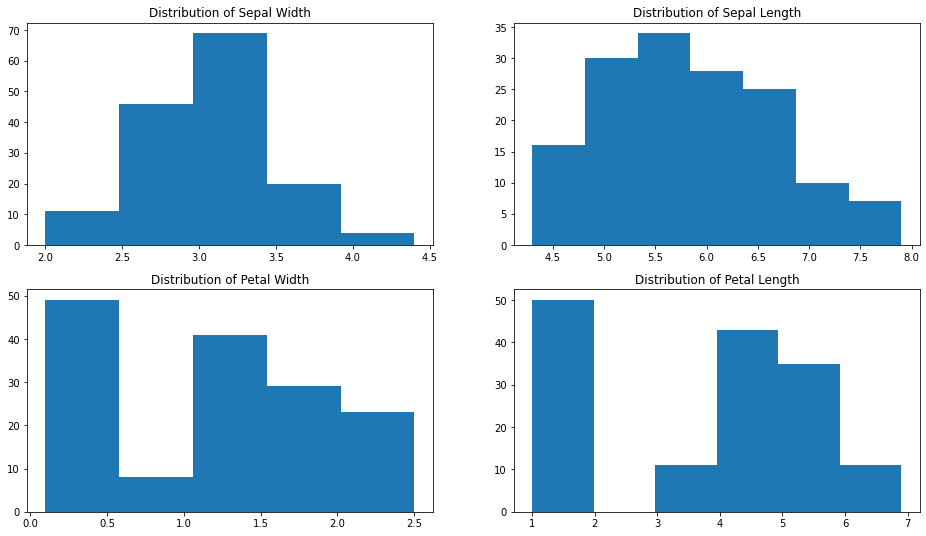

In [83]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
axes[0,0].set_title("Distribution of Sepal Width")
axes[0,0].hist(df['sepal width in cm'],bins=5)
axes[0,1].set_title("Distribution of Sepal Length")
axes[0,1].hist(df['sepal length in cm'],bins=7)
axes[1,0].set_title("Distribution of Petal Width")
axes[1,0].hist(df['petal width in cm'],bins=5)
axes[1,1].set_title("Distribution of Petal Length")
axes[1,1].hist(df['petal length in cm'],bins=6)

* The Highest frequency of sepal width is between 3.0 to 3.5 which is around 70.
* The Highest frequency of sepal length is between 5.5 and 6.0 which is around 35.
* The Highest frequency of petal width is between 0 to 0.5 which is around 50.
* The Highest frequency of petal length is between 0 to 0.5 which is around 50.

In [134]:
features=df.iloc[:,:]
target=df.iloc[:,-1]

In [135]:
features["class"].nunique()

3

In [136]:
pd.get_dummies(features["class"])

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal length in cm  150 non-null    float64
 1   sepal width in cm   150 non-null    float64
 2   petal length in cm  150 non-null    float64
 3   petal width in cm   150 non-null    float64
 4   class               150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [138]:
from sklearn.preprocessing import LabelEncoder

In [139]:
le=LabelEncoder()
le.fit_transform(features["class"])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [140]:
from sklearn.preprocessing import OrdinalEncoder

In [142]:
oe=OrdinalEncoder()
oe.fit_transform(features[["class","petal length in cm"]])

array([[ 0.,  4.],
       [ 0.,  4.],
       [ 0.,  3.],
       [ 0.,  5.],
       [ 0.,  4.],
       [ 0.,  7.],
       [ 0.,  4.],
       [ 0.,  5.],
       [ 0.,  4.],
       [ 0.,  5.],
       [ 0.,  5.],
       [ 0.,  6.],
       [ 0.,  4.],
       [ 0.,  1.],
       [ 0.,  2.],
       [ 0.,  5.],
       [ 0.,  3.],
       [ 0.,  4.],
       [ 0.,  7.],
       [ 0.,  5.],
       [ 0.,  7.],
       [ 0.,  5.],
       [ 0.,  0.],
       [ 0.,  7.],
       [ 0.,  8.],
       [ 0.,  6.],
       [ 0.,  6.],
       [ 0.,  5.],
       [ 0.,  4.],
       [ 0.,  6.],
       [ 0.,  6.],
       [ 0.,  5.],
       [ 0.,  5.],
       [ 0.,  4.],
       [ 0.,  5.],
       [ 0.,  2.],
       [ 0.,  3.],
       [ 0.,  5.],
       [ 0.,  3.],
       [ 0.,  5.],
       [ 0.,  3.],
       [ 0.,  3.],
       [ 0.,  3.],
       [ 0.,  6.],
       [ 0.,  8.],
       [ 0.,  4.],
       [ 0.,  6.],
       [ 0.,  4.],
       [ 0.,  5.],
       [ 0.,  4.],
       [ 1., 23.],
       [ 1., 21.],
       [ 1.,

In [143]:
cols=features.select_dtypes(["object"]).columns
cols

Index(['class'], dtype='object')

In [144]:
features[cols]=oe.fit_transform(features[cols])

In [145]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal length in cm  150 non-null    float64
 1   sepal width in cm   150 non-null    float64
 2   petal length in cm  150 non-null    float64
 3   petal width in cm   150 non-null    float64
 4   class               150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


##  MinMaxScaler


In [101]:
n1=df['sepal length in cm']
n2=df['sepal width in cm']
n3=df['petal length in cm']
n4=df['petal width in cm']

In [94]:
def minmax(arr):
    xnew=(arr-arr.min())/(arr.max()-arr.min())
    return xnew

In [99]:
minmax(n1)

0      0.222222
1      0.166667
2      0.111111
3      0.083333
4      0.194444
         ...   
145    0.666667
146    0.555556
147    0.611111
148    0.527778
149    0.444444
Name: sepal length in cm, Length: 150, dtype: float64

In [102]:
minmax(n2)

0      0.625000
1      0.416667
2      0.500000
3      0.458333
4      0.666667
         ...   
145    0.416667
146    0.208333
147    0.416667
148    0.583333
149    0.416667
Name: sepal width in cm, Length: 150, dtype: float64

In [103]:
minmax(n3)

0      0.067797
1      0.067797
2      0.050847
3      0.084746
4      0.067797
         ...   
145    0.711864
146    0.677966
147    0.711864
148    0.745763
149    0.694915
Name: petal length in cm, Length: 150, dtype: float64

In [104]:
minmax(n4)

0      0.041667
1      0.041667
2      0.041667
3      0.041667
4      0.041667
         ...   
145    0.916667
146    0.750000
147    0.791667
148    0.916667
149    0.708333
Name: petal width in cm, Length: 150, dtype: float64

In [147]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
features.iloc[:,:]=mn.fit_transform(features.iloc[:,:])
features.tail()


,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
145,0.666667,0.416667,0.711864,0.916667,1.0
146,0.555556,0.208333,0.677966,0.750000,1.0
147,0.611111,0.416667,0.711864,0.791667,1.0
148,0.527778,0.583333,0.745763,0.916667,1.0
149,0.444444,0.416667,0.694915,0.708333,1.0


## Standard Scaler

In [148]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
features.iloc[:,:]=ss.fit_transform(features.iloc[:,:])
features.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,-0.900681,1.032057,-1.341272,-1.312977,-1.224745
1,-1.143017,-0.124958,-1.341272,-1.312977,-1.224745
2,-1.385353,0.337848,-1.398138,-1.312977,-1.224745
3,-1.506521,0.106445,-1.284407,-1.312977,-1.224745
4,-1.021849,1.263460,-1.341272,-1.312977,-1.224745


In [149]:
features.shape

(150, 5)

In [150]:
target.shape

(150,)

In [151]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.2,random_state=1)

In [152]:
xtrain.shape

(120, 5)

In [121]:
ytrain.shape

(120,)

In [122]:
xtest.shape

(30, 4)

In [123]:
ytest.shape

(30,)